Theodoros Lambrou

# Gradient descent methods


## Simple quadratic function




$f(x) = x_1^2 +x_2^2$ where, $x ∈ R^2$ and $x = (x1, x2)^T$

### 1.1.1

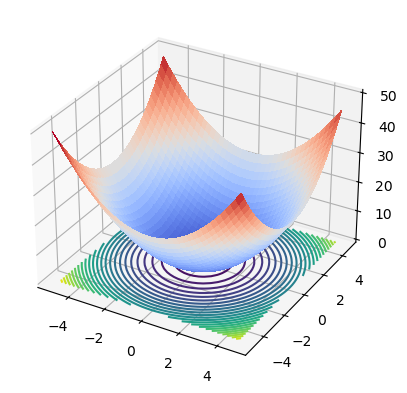

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

X_1 = np.arange(-5, 5, 0.25)
X_2 = np.arange(-5, 5, 0.25)

X_1, X_2 = np.meshgrid(X_1, X_2)
Z = X_1**2 + X_2**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_1, X_2, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

ax.contour(X_1,X_2,Z,30,zdir='z', offset=0)
plt.show()

Implementing the gradient descent method

Using constant step $ x^{k+1} = x^k - \alpha^k \nabla f(x^k) $

The analytical gradient is $ \nabla f(x) = [2x_1, 2x_2] $


In [2]:

x_1,x_2 = sp.symbols('x_1 x_2')
f = x_1**2 + x_2**2
grad_f = [sp.diff(f, var).simplify() for var in (x_1,x_2)]

def eval_grad(grad_f, c_1, c_2):
  valor_grad_f = np.array([grad.subs({x_1: c_1, x_2: c_2}) for grad in grad_f])
  return valor_grad_f

def grad_path(x0, f=f, max_it=100, lr=0.1):
  x_k = x0
  x_path, y_path = [], []

  for it in range(max_it):
    x_path += [x_k[0]]
    y_path += [x_k[1]]

    grad = eval_grad(grad_f, x_k[0], x_k[1])

    x_k = x_k - lr*grad

  return x_path, y_path


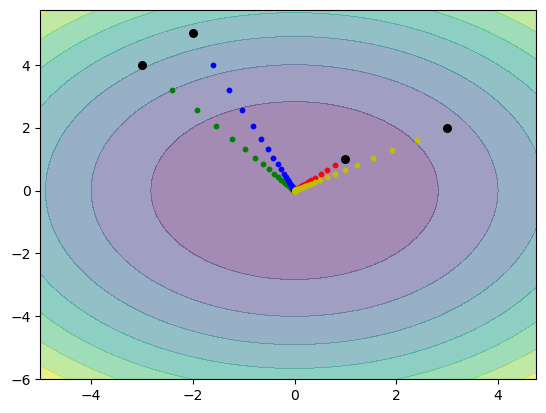

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X0 = [
    [np.array([1, 1]), 'r'],
    [np.array([-3, 4]), 'g'],
    [np.array([-2, 5]), 'b'],
    [np.array([3, 2]), 'y']
] 

X_1 = np.arange(-5, 5, 0.25)
X_2 = np.arange(-6, 6, 0.25)
X_1, X_2 = np.meshgrid(X_1,X_2)
Z = X_1**2 + X_2**2
plt.contourf(X_1, X_2, Z, alpha=0.5)


for x0, color in X0:
    x_path, y_path = grad_path(x0, lr=0.1)
    plt.scatter(x_path, y_path, c=color, s=10)
    plt.scatter(x0[0], x0[1], c='black', s=30)

plt.show()


All the experiments converge to the unique minimum point, which is in the center of the plot. 

### 1.1.2

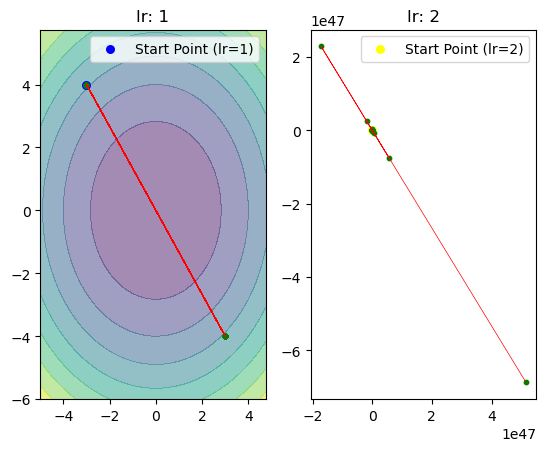

In [4]:
x0 = np.array([-3, 4])

learning_rates = [1, 2]

for i, lr in enumerate(learning_rates, start=1):
    x_path, y_path = grad_path(x0, lr=lr)
    edge_color ='blue' if i == 1 else 'yellow'  

    plt.subplot(1, 2, i)
    plt.contourf(X_1, X_2, Z, alpha=0.5)

    plt.scatter(x_path[0], y_path[0], c=edge_color, s=30, label=f'Start Point (lr={lr})')
    plt.scatter(x_path, y_path, c='green',s=10)

    plt.plot(x_path, y_path, color='red',linewidth=0.5)

    plt.title(f'lr: {lr}')
    plt.legend()

The gradient descent method is going back & forth over the minimum hence the plots are not clear enough 

## Function with multiple minima



\begin{align}
f(x_1, x_2) &= x_1^2 \left(4 - 2.1x_1^2 + \frac{1}{3}x_1^4\right) + x_1x_2 + x_2^2 \left(-4 + 4x_2^2\right)
\end{align}




In [5]:
x_1, x_2 = sp.symbols('x_1 x_2')

f = x_1**2 * (4 - 2.1*x_1**2 + 1/3*x_1**4) + x_1*x_2 + x_2**2*(-4 + 4*x_2**2)
grad_f = [sp.diff(f, var).simplify() for var in (x_1, x_2)]
print('function:  ', f.simplify())
print('gradient:  ', grad_f)

function:   x_1**2*(0.333333333333333*x_1**4 - 2.1*x_1**2 + 4) + x_1*x_2 + 4*x_2**2*(x_2**2 - 1)
gradient:   [2.0*x_1**5 - 8.4*x_1**3 + 8.0*x_1 + 1.0*x_2, x_1 + 16*x_2**3 - 8*x_2]


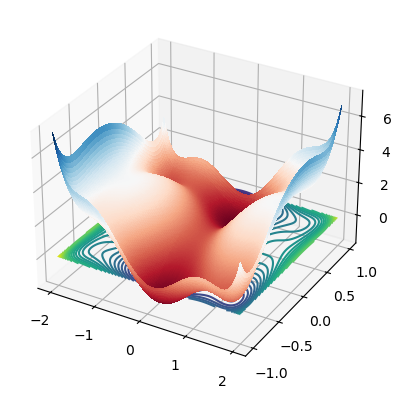

In [6]:
def f(x_1, x_2):
  return (x_1**2 * (4 - 2.1*x_1**2 + 1/3*x_1**4) + x_1*x_2 + x_2**2*(-4 + 4*x_2**2))

def grad_f(x_1, x_2):
    return np.array([8*x_1-8.4*x_1**3+2*x_1**5+x_2, x_1 - 8*x_2+16*x_2**3])

X_1 = np.arange(-2, 2, 0.02)
X_2 = np.arange(-1, 1, 0.01)
X_1, X_2 = np.meshgrid(X_1, X_2)
Z = X_1**2 * (4 - 2*X_1**2 + 1/3 * X_1**4) + X_1*X_2 + X_2**2*(-4 + 4*X_2**4)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_1, X_2, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
ax.contour(X_1,X_2,Z,30,zdir='z',offset=0)
plt.show()

### 1.2.1

In [7]:
def grad_path(x0, f=f, max_it=100, lr=0.1):
  x_k = x0
  x_path, y_path = [],[]

  for it in range(max_it):
    x_path += [x_k[0]]
    y_path += [x_k[1]]
    grad = grad_f(x_k[0], x_k[1])
    x_k = x_k - lr*grad

  return x_path,y_path

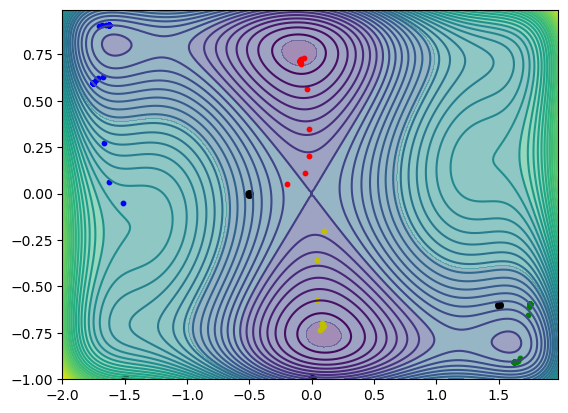

In [8]:
plt.figure()
plt.contour(X_1, X_2, Z, 50)

X0 = [
    [np.array([-1.5, -1]), 'b'],
    [np.array([0, -1]), 'y'],
    [np.array([-0.5, 0]), 'r'],
    [np.array([1.5, -0.6]), 'g']
] 

X_1 = np.arange(-2, 2, 0.02)
X_2 = np.arange(-1, 1, 0.01)
X_1, X_2 = np.meshgrid(X_1, X_2)

Z = X_1**2 * (4 - 2*X_1**2 + 1/3 * X_1**4) + X_1*X_2 + X_2**2*(-4 + 4*X_2**4)
plt.contourf(X_1, X_2, Z, alpha=0.5)

for x0, color in X0:
    x_path, y_path = grad_path(x0, f, lr=0.1)
    plt.scatter(x_path, y_path, c=color, s=10)
    plt.scatter(x0[0], x0[1], c='black', s=30)

plt.show()

#### 1.2.2 (a)

In [9]:
import numpy as np

In [10]:
def gradient_descent_adapt_alpha(x_0, f, grad, f_tol=1e-3, grad_tol=1e-5):
    x = [x_0]
    while True:      # Iteration until one of the stop criteria is met
        alpha = 1
        grad_x = grad(*x_0)
        while f(*(x_0 - alpha * grad_x)) >= f(*x_0):
            alpha /= 2

        x_0 = x_0 - alpha * grad_x         #formula to compute the next iteration point

        x.append(x_0)
        #  return the history of points if one of the criteria is met
        if np.abs(f(*x[-1]) - f(*x[-2])) < f_tol or np.linalg.norm(grad(*x[-1])) < grad_tol:
            return np.array(x)

    return np.array(x)

#### 1.2.2 (b)

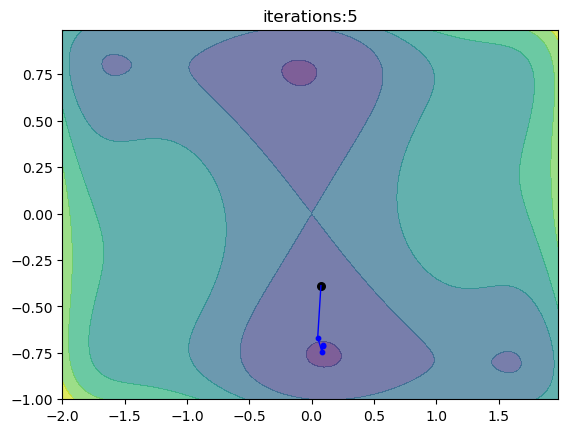

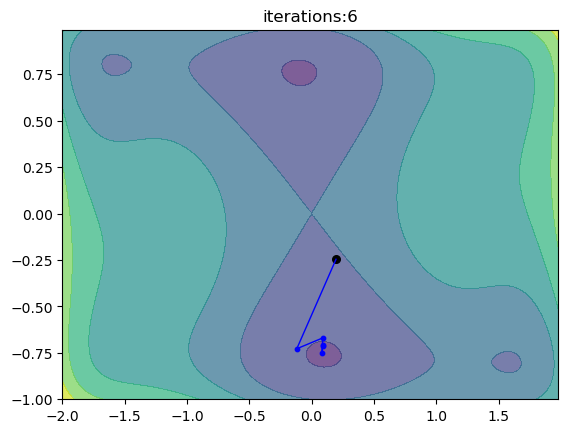

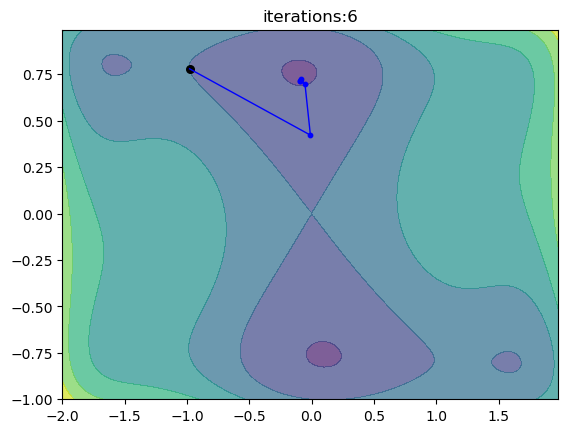

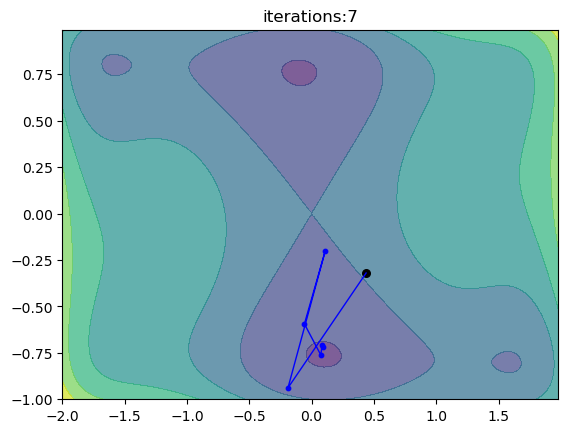

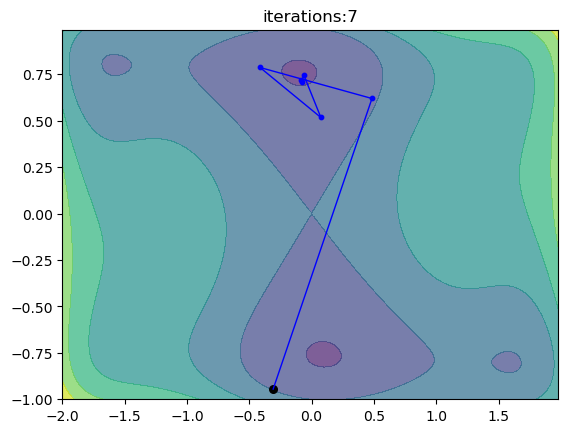

In [11]:
for i in range(5):
  X_1 = np.arange(-2, 2, 0.02)
  X_2 = np.arange(-1, 1, 0.01)
  X_1, X_2 = np.meshgrid(X_1, X_2)
  Z = X_1**2 * (4 - 2*X_1**2 + 1/3 * X_1**4) + X_1*X_2 + X_2**2*(-4 + 4*X_2**4)
  plt.contourf(X_1, X_2, Z, alpha=0.7)

  x_0 = (np.random.rand(2) - 0.5) * 2   # random starting point

  x = gradient_descent_adapt_alpha(x_0, f=f, grad=grad_f)   # building path

  # Extracting x and y coordinates 
  path_x = [point[0] for point in x]
  path_y = [point[1] for point in x]

  plt.plot(path_x, path_y, c='blue', linewidth=1.0)

  # Plot the points individually
  plt.scatter(path_x, path_y, c='blue', s=10)
    
  plt.scatter(x_0[0], x_0[1], c='black', s=30)

  title = "iterations:" + str(len(x))
  plt.title(title)
  plt.show()

The experiments showcase that the number of iterations to reach the minimum is about 5-6 which indicates good performance

## 1.3 The Rosenbrock function


$ f(x_1, x_2) = (a - x_1)^2 + b(x_2 - x_1^2)^2 $

### Exercise 1

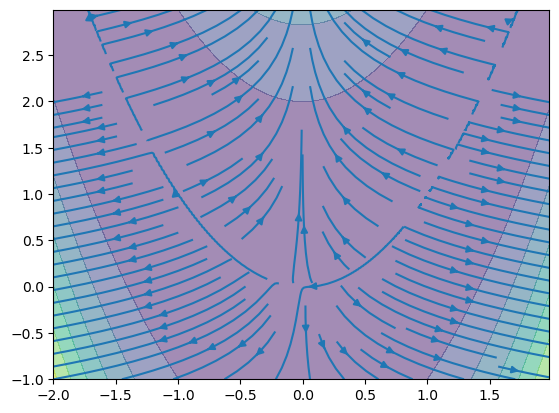

In [12]:
def f_rosen(x_1, x_2, a=1, b=100):
  return (a-x_1)**2 + b*(x_2 - x_1**2)**2

def grad_f_rosen(x_1, x_2, a=1, b=100):
    return np.array([-2*(a - x_1) - 4*b*(x_2 - x_1**2)*x_1, 2*b*(x_2 - x_1**2) ])

a, b = 1, 100

X_1 = np.arange(-2, 2, 0.02)
X_2 = np.arange(-1, 3, 0.01)
X_1, X_2 = np.meshgrid(X_1, X_2)
Z = (a-X_1)**2 + b*(X_2 - X_1**2)**2
plt.contourf(X_1, X_2, Z, alpha=0.5)

gradx, grady = grad_f_rosen(X_1,X_2)
plt.streamplot(X_1, X_2, gradx, grady)

### Exercise 2

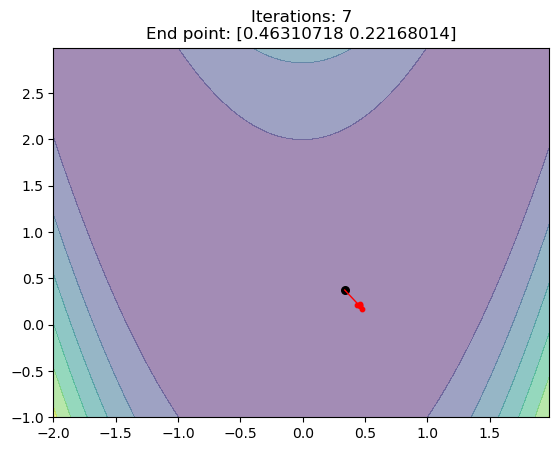

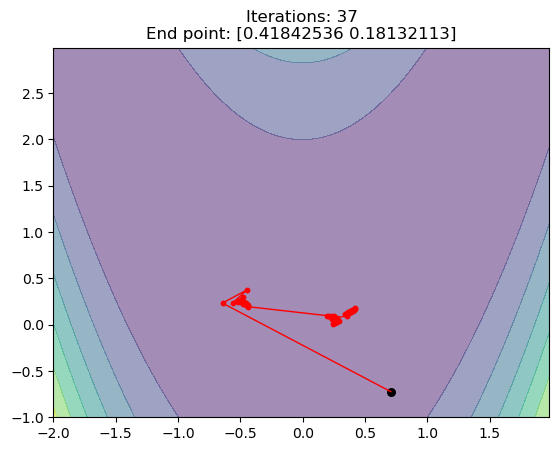

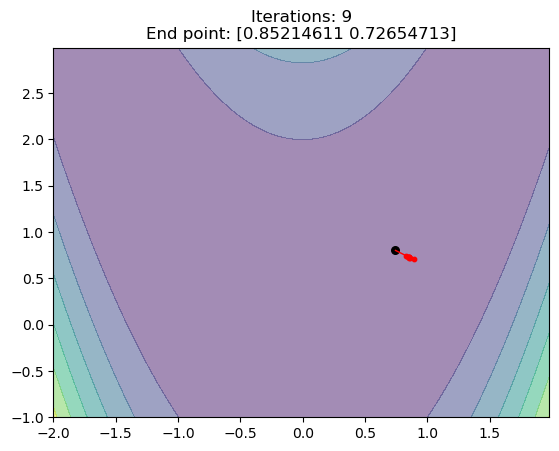

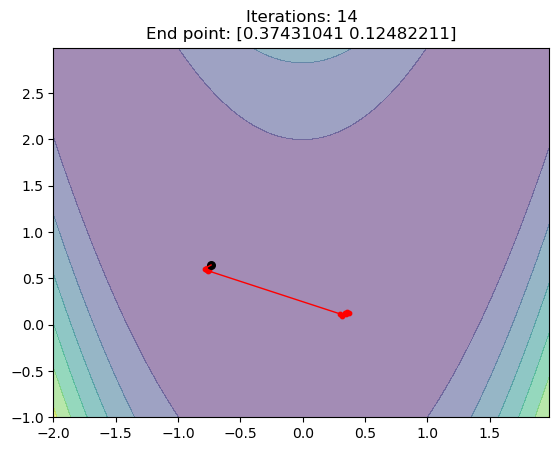

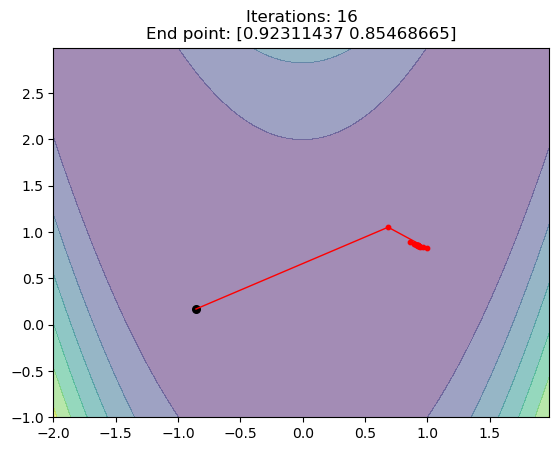

In [13]:
for i in range(5):
  X_1 = np.arange(-2, 2, 0.02)
  X_2 = np.arange(-1, 3, 0.01)
  X_1, X_2 = np.meshgrid(X_1, X_2)
  Z = (a-X_1)**2 + b*(X_2 - X_1**2)**2
  plt.contourf(X_1, X_2, Z, alpha=0.5)

  x_0 = (np.random.rand(2) - 0.5) * 2 #random point
  x = gradient_descent_adapt_alpha(x_0, f=f_rosen, grad=grad_f_rosen) #building path

  path_x = [point[0] for point in x]
  path_y = [point[1] for point in x]

  plt.plot(path_x, path_y, c='red', linewidth=1.0)
  plt.scatter(path_x, path_y, c='red', s=10)
  plt.scatter(x_0[0], x_0[1], c='black', s=30)

  title = "Iterations: " + str(len(x)) + '\n' + 'End point: ' + str(x[-1])
  plt.title(title)
  plt.show()

The actual minimum (which is $(x_1, x_2) = (1,1)$) is not met even when all criteria are satisfied.

We get the following result if we lower the threshold:

$tol_{grad}=1e-10, tol_{f}=1e-10$




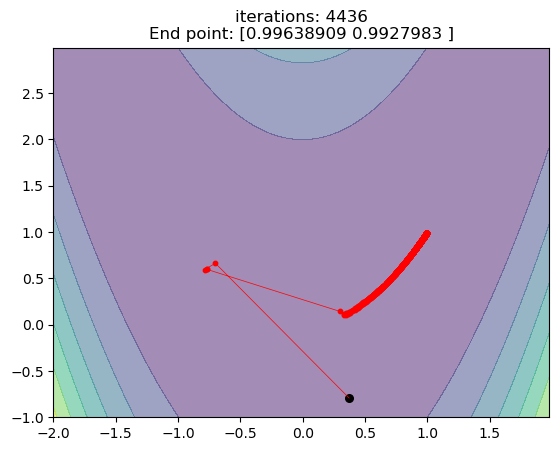

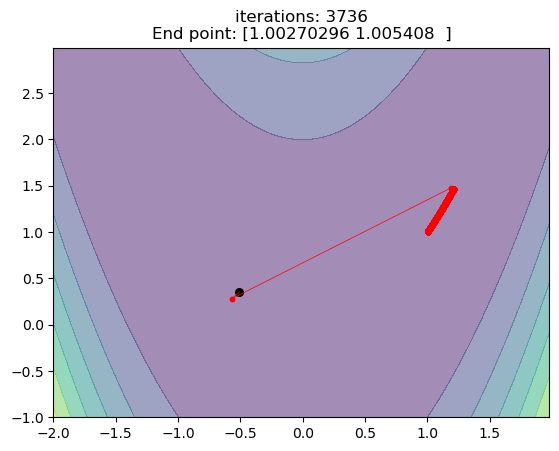

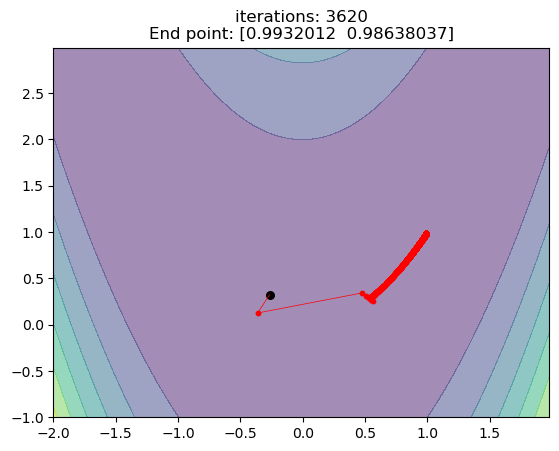

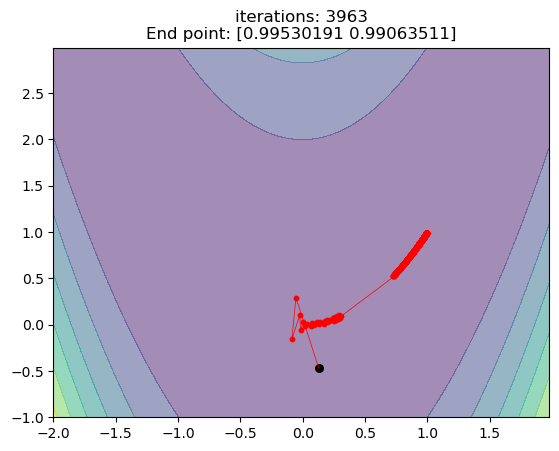

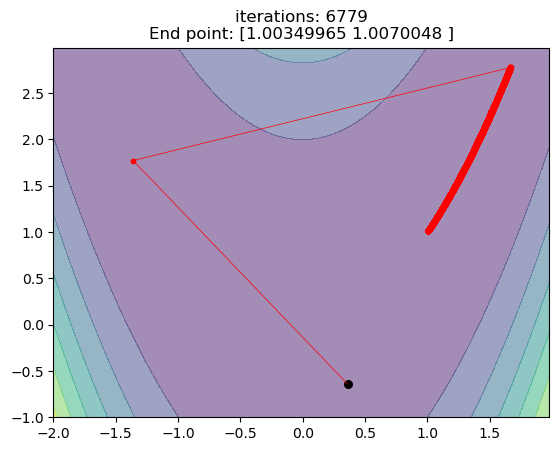

In [14]:
for i in range(5):
  X_1 = np.arange(-2, 2, 0.02)
  X_2 = np.arange(-1, 3, 0.01)
  X_1, X_2 = np.meshgrid(X_1, X_2)
  Z = (a-X_1)**2 + b*(X_2 - X_1**2)**2
  plt.contourf(X_1, X_2, Z, alpha=0.5)

  x_0 = (np.random.rand(2) - 0.5) * 2
  x = gradient_descent_adapt_alpha(x_0, f=f_rosen, grad=grad_f_rosen, grad_tol=1e-10, f_tol=1e-10)

  path_x = [point[0] for point in x]
  path_y = [point[1] for point in x]

  plt.plot(path_x, path_y, c='red', linewidth=0.5)
  plt.scatter(path_x, path_y, c='red', s=10)
  plt.scatter(x_0[0], x_0[1], c='black', s=30)

  tit = "iterations: " + str(len(x)) + '\n' + 'End point: ' + str(x[-1])
  plt.title(tit)
  plt.show()

With significantly more iterations the minimum is reached.


# 2 Newton descent method

## 2.1 A simple quadratic function

$ f(x) = 100 x_1^2 + x_2^2 $

### 2.1.1

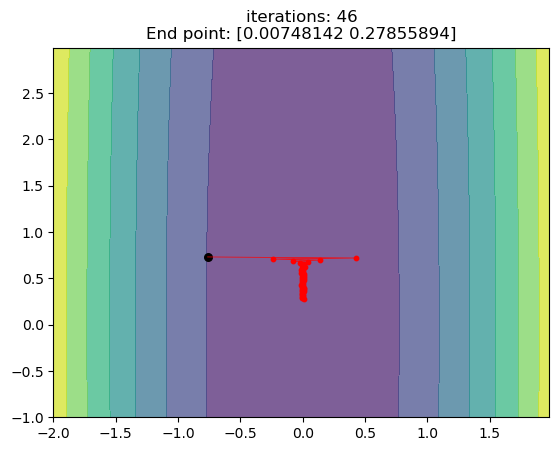

In [15]:
def f_2(x_1, x_2):
  return(100*x_1**2 + x_2**2)

def grad_f_2(x_1, x_2):
  return np.array([200*x_1, 2*x_2])

def hess_f_2(x_1, x_2):
    return np.matrix([[200, 0], [0, 2]])

X_1 = np.arange(-2, 2, 0.02)
X_2 = np.arange(-1, 3, 0.01)
X_1, X_2 = np.meshgrid(X_1, X_2)
Z = 100*X_1**2 + X_2**2
plt.contourf(X_1, X_2, Z, alpha=0.7)

x_0 = (np.random.rand(2) - 0.5) * 2

x = gradient_descent_adapt_alpha(x_0, f=f_2, grad=grad_f_2)

path_x = [point[0] for point in x]
path_y = [point[1] for point in x]

plt.plot(path_x, path_y, c='red', linewidth=0.5)
plt.scatter(path_x, path_y, c='red', s=10)
plt.scatter(x_0[0], x_0[1], c='black', s=30)

title = "iterations: " + str(len(x)) + '\n' + 'End point: ' + str(x[-1])
plt.title(title)
plt.show()

The function is positive so the minimum is at $(0,0)$


### 2.1.2

In [16]:
def newton_method_adapt_alpha(f, grad_f, hess_f, x_0, grad_tol=1e-5, f_tol=1e-3):
    x = [x_0]
    while True:
        d_k = - np.linalg.inv(hess_f(*x_0)) * np.array([grad_f(*x_0)]).T  # compute d^k by solving the linear system of equation
        d_k = np.ravel(d_k) #dimension change 
        alpha = 1  #alpha backtracked 

        while f(*(x_0 + (alpha * d_k))) >= f(*x_0):
            alpha /= 2

        x_0 = x_0 + alpha * d_k
        x.append(x_0)

        if np.abs(f(*x[-1]) - f(*x[-2])) < f_tol or np.linalg.norm(grad_f(*x[-1])) < grad_tol: #criterion
            return np.array(x)

    return np.array(x)

newton_color = np.array([[0,1,0]])


def plot_function(f, range_x, range_y, step_x, step_y, grad_line=None, colors=None, grad=None):
    X = np.arange(range_x[0], range_x[1], step_x)
    Y = np.arange(range_y[0], range_y[1], step_y)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)

    plt.figure()
    plt.contour(X, Y, Z, 50)

    if grad_line is not None:
        if colors is None:
            colors = np.zeros((len(grad_line),3))
            colors[:,0] = 1
        plt.plot(*grad_line.T, zorder=1)
        plt.scatter(*grad_line.T, color=colors, zorder=2)

    if grad is not None:
        gradx, grady = grad(X,Y)
        plt.streamplot(X, Y, gradx, grady)


    plt.show()

iterations:  2
Min candidate: (1.1102230246251565e-16, 0.0)


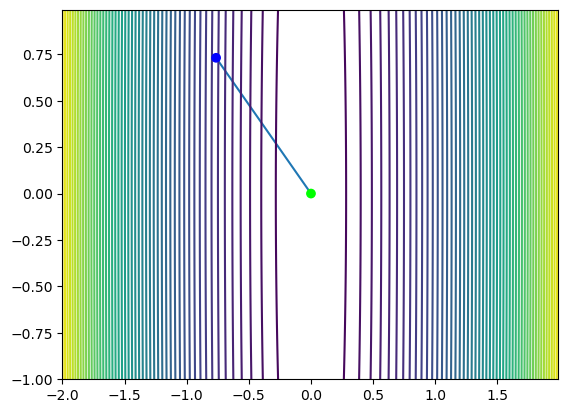

In [17]:
x = newton_method_adapt_alpha(f_2, grad_f_2, hess_f_2, x_0)

colors = np.repeat(newton_color, len(x), axis=0)
colors[0] = np.array([0,0,1])

print("iterations: ", len(x))
print("Min candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

plot_function(f_2, [-2,2], [-1,1], 0.01, 0.01, x, colors)

### 2.1.3

The number of iterations went down from 11 to 2, which means is a better optimization.

## 2.2 A function with multiple minima

Same fuction as in Section 1.2

\begin{align}
f(x_1, x_2) &= x_1^2 \left(4 - 2.1x_1^2 + \frac{1}{3}x_1^4\right) + x_1x_2 + x_2^2 \left(-4 + 4x_2^2\right)
\end{align}

### 2.2.1


iterations:  6
Min candidate: (-0.08955779349485861, 0.715690904122361)


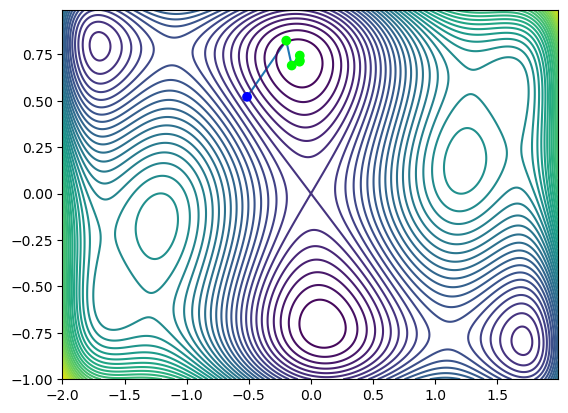

iterations:  5
Min candidate: (-0.09010352070160145, 0.7126730643372281)


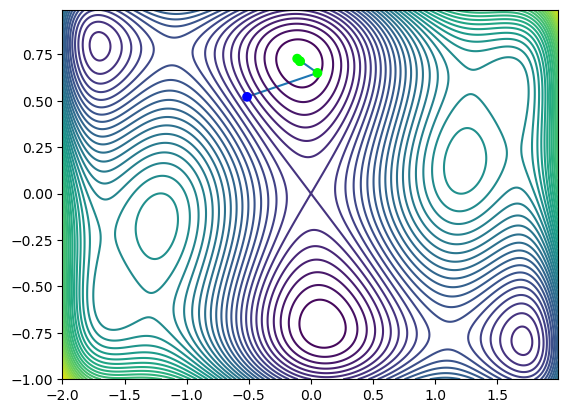

In [18]:
def f2d(x_1, x_2):
    return x_1**2*(4-2.1*x_1**2 + (1/3)*x_1**4) + x_1*x_2 + x_2**2*(-4+4*x_2**2)

def grad2d(x_1, x_2):
    return np.array([8*x_1-8.4*x_1**3+2*x_1**5+x_2, x_1 - 8*x_2+16*x_2**3])

def hess2d(x_1, x_2):    #hessian matrix
    hess = np.matrix('0 1; 1 0')
    hess[0, 0] = 8-25.2*x_1**2+10*x_1**4
    hess[1, 1] = -8 + 48*x_2**2
    return hess
    
X_1 = np.arange(-2, 2, 0.02)
X_2 = np.arange(-1, 1, 0.01)
X_1, X_2 = np.meshgrid(X_1, X_2)
Z = X_1**2 * (4 - 2*X_1**2 + 1/3 * X_1**4) + X_1*X_2 + X_2**2*(-4 + 4*X_2**4)

x_0 = (np.random.rand(2) - 0.5) * 2 #random starting point

x = gradient_descent_adapt_alpha(x_0, f=f2d, grad=grad2d)

colors = np.repeat(newton_color, len(x), axis=0)
colors[0] = np.array([0,0,1])

print("iterations: ", len(x))
print("Min candidate: (" + str(x[-1][0]) + ", " +str(x[-1][1]) + ")")

plot_function(f2d, [-2,2], [-1,1], 0.01, 0.01, x, colors)



x = newton_method_adapt_alpha(f2d, grad2d, hess2d, x_0)

colors[0] = np.array([0,0,1])
colors = np.repeat(newton_color, len(x), axis=0)
colors[0] = np.array([0,0,1])

print("iterations: ", len(x))
print("Min candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

plot_function(f2d, [-2,2], [-1,1], 0.01, 0.01, x, colors)

number of iterations 5-6



### 2.2.2 

In [19]:
def gradient_newton_adapt_alpha(f, grad_f, hess_f, x_0, grad_tol=1e-5, f_tol=1e-3):
    x = [x_0]
    colors = [np.array([0,0,1])]
    while True:
        hessian_x = hess_f(*x_0) #Evaluating the hessian
        eigvals = np.linalg.eigvals(hessian_x) #computing its eigenvalue

        #If all the eigvals are positive the Newton method is executed
        if np.all(eigvals > 0):
            d_k = - np.linalg.inv(hessian_x) * np.array([grad_f(*x_0)]).T
            d_k = np.ravel(d_k)
            colors.append(newton_color[0]) 

        # Otherwise the gradient descent is followed
        else:
            d_k = - grad_f(*x_0) 
            colors.append(newton_color[0]) 

        alpha = 1
        while f(*(x_0 + (alpha * d_k))) >= f(*x_0):
            alpha /= 2

        #this formula may implement either Newton Method or gradient descent in each iteration depending on d_k
        x_0 = x_0 + alpha * d_k
        x.append(x_0)

        #criteria to stop
        if np.abs(f(*x[-1]) - f(*x[-2])) < f_tol or np.linalg.norm(grad_f(*x[-1])) < grad_tol:
            return np.array(x), np.array(colors)

    return np.array(x), np.array(colors)

iterations:  6
Min candidate: (-1.7035902245446946, 0.7960836093742143)


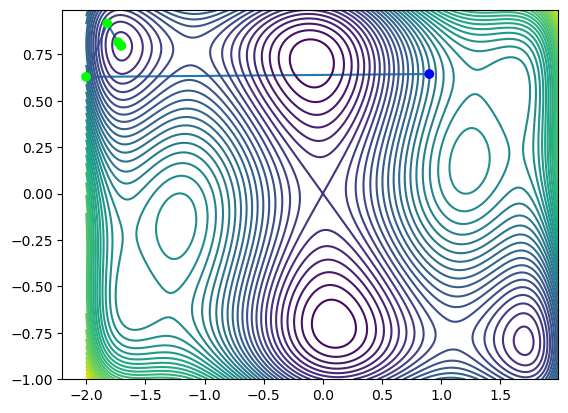

In [20]:
x_0 = (np.random.rand(2) - 0.5) * 2

x, colors = gradient_newton_adapt_alpha(f2d, grad2d, hess2d, x_0)

print("iterations: ", len(x))
print("Min candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

plot_function(f2d, [-2,2], [-1,1], 0.01, 0.01, x, colors)

It appears that the minimum Newton method has been used.

### 2.2.3

iterations: 9
Min candidate: (-0.08926481818132102, 0.7126951158259651)


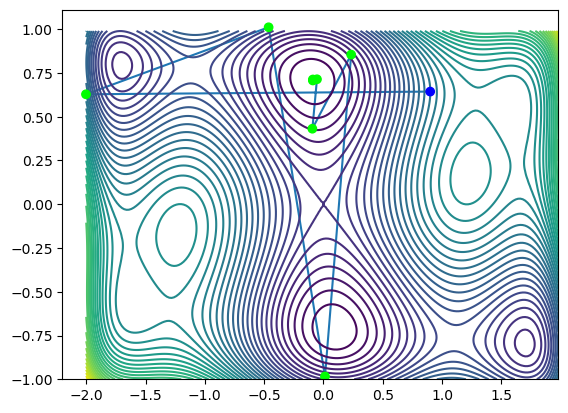

In [21]:
x = gradient_descent_adapt_alpha(x_0, f2d, grad2d)

print("iterations:", len(x))
print("Min candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

colors = np.repeat(newton_color, len(x), axis=0)
colors[0] = np.array([0,0,1])

plot_function(f2d, [-2,2], [-1,1], 0.02, 0.01, x, colors)

The number of iterations required to arrive to the mimimum between these methods, is similar

## 2.3 The Rosenbrock function


### 2.3.1




In [22]:
a = 1
b = 100

def hess_rosen(x_1, x_2, a=1, b=100):
    hess = np.matrix('0 0; 0 0')
    hess[0, 0] = 2*(6*b*x_1**2-2*b*x_2+1)
    hess[0, 1] = -4*b*x_1
    hess[1, 0] = -4*b*x_1
    hess[1, 1] = 2*b
    return hess

In [23]:
x_0 = np.array([0.,1.])

x = gradient_descent_adapt_alpha(x_0, f_rosen, grad_f_rosen)

colors = np.repeat(newton_color, len(x), axis=0)
colors[0] = np.array([0,0,1])

print("iterations: ", len(x))
print("Min candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")


x = newton_method_adapt_alpha(f_rosen, grad_f_rosen, hess_rosen, x_0)

colors = np.repeat(newton_color, len(x), axis=0)
colors[0] = np.array([0,0,1])

print("iterations: ", len(x))
print("Min candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")


iterations:  47
Min candidate: (0.4512917617945735, 0.21119439445312368)
iterations:  14
Min candidate: (0.9946278663362127, 0.9892357686141814)


The Newton method reaches the mimimum (1,1) with 14 iterations.
The gradient method requires 47 iterations and stops at (0.45,0.21)

### 2.3.2


iterations:  14
Min candidate: (0.9903183611021965, 0.9805673170708421)


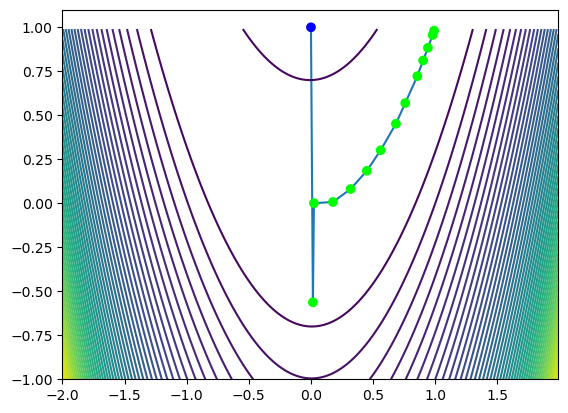

In [24]:
x, colors = gradient_newton_adapt_alpha(f_rosen, grad_f_rosen, hess_rosen, x_0)

print("iterations: ", len(x))
print("Min candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

plot_function(f_rosen, [-2,2], [-1,1], 0.01, 0.01, x, colors)

The Newton-gradient method requires 14 iterations, and is used near the lowest curve.